# This project aims to predict the price of House by hand

## Loading the data

In [560]:
import pandas as pd
import numpy as np

train_path = 'train.csv'
test_path = 'test.csv'

train_data = pd.read_csv(train_path, index_col='Id')
test_data = pd.read_csv(test_path, index_col='Id')

X_train = train_data.sample(frac = 0.8, random_state = 0)
X_dev = train_data.drop(X_train.index)

y_train = X_train.pop('SalePrice').to_frame()
y_dev = X_dev.pop('SalePrice').to_frame()

## Drop all object columns

In [561]:
X_train_object_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train = X_train.drop(X_train_object_columns, axis=1)
X_dev = X_dev.drop(X_train_object_columns, axis=1)

## Process NaN data

In [562]:
# drop year
X_train = X_train.drop('GarageYrBlt', axis = 1)
X_dev = X_dev.drop('GarageYrBlt', axis = 1)

# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

for col in cols_with_missing:
    values = [value for value in X_train[col].values if not np.isnan(value)]
    avarge = sum(values) / len(values)
    X_train.loc[X_train.loc[:, col].isnull(), col] = avarge
    X_dev.loc[X_dev.loc[:, col].isnull(), col] = avarge

## Normalization

In [563]:
# X_train.head()
def normalization(X):
    _X = X.copy()
    for column in _X.columns:
        mean = _X[column].mean()
        _max = max(_X[column])
        _min = min(_X[column])
        if _max - _min != 0:
            _X.loc[:, column] = (_X[column] - mean) / (_max - _min)
    return _X
        
#debug
# normalization(X_train)

In [564]:
X_train = normalization(X_train)
X_dev = normalization(X_dev)

X_train.insert(0, "x0", 1)
X_dev.insert(0, "x0", 1)

## Using Linear Regression to solve the problem

In [565]:
n = X_train.shape[1]
theta = pd.DataFrame(np.random.rand(n))
alpha = 1e-2
epochs = 100

## Hypothesis formula

In [566]:
# Hypothesis formula
# X = m * n
# theta = n * 1
def hypothesisFormula(X, theta):
    _X = X.copy()
    _X = _X[:].values
    return _X.dot(theta)

# debug
# debug_X = pd.DataFrame([[1, 2], [3, 4], [5, 6], [7, 8]])
# debug_theta = pd.DataFrame([2, 3])
# hypothesisFormula(debug_X, debug_theta)

## Cost Function

In [567]:
# Cost function
def costFunction(X, y, theta):
    m = X.shape[0]
    predictX = hypothesisFormula(X, theta)
    return (1 / (2 * m)) * (((predictX - y).values ** 2).sum())

# debug
# costFunction(X_dev, y_dev, theta)

## Gradient descent

In [568]:
def gradientDescent(X, y, theta, alpha):
    _X = X.copy()
    m = _X.shape[0]
    H = hypothesisFormula(_X, theta)
    _X.loc[:, 'x0'] = 0
    newTheta = theta - (alpha * (1 / m) * (X.T.dot((H - y).values))).values
    return newTheta

# debug
# gd = gradientDescent(X_dev, y_dev, theta, alpha)
# print(gd)

## Start training

In [569]:
theta = pd.DataFrame(np.random.rand(n))

gradientDescent(X_train, y_train, theta, alpha)

train_cfs = []
dev_cfs = []

for epoch in range(10000):
    train_cfs.append(costFunction(X_train, y_train, theta))
    dev_cfs.append(costFunction(X_dev, y_dev, theta))
    theta = gradientDescent(X_train, y_train, theta, alpha)

## Plot Cost function

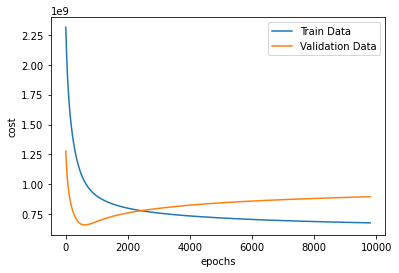

In [574]:
import matplotlib.pyplot as plt

plt.plot(train_cfs[200:], label="Train Data")
plt.plot(dev_cfs[200:], label="Validation Data")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()